<h1>Encontrando la relación entre estrato y rendimiento</h1> 

In [1]:
# Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

<h2> Carga de datos y breve exploración </h2>

In [2]:
df_cluster = pd.read_csv('dataset_bascula.csv')

In [3]:
df_cluster.head()

,Mes,Semana,fecha,Estrato,Grupo,Hora,Brix jugo,Pol jugo,Pureza jugo,% AR jugo,...,% Jugo,Brix caña,Pol caña,Pza. caña,Rdto. Pol Bascula,% Fibra caña,Calidad Caña,Humedad caña,Variedad,ENVIO
0,Noviembre,1,06-nov-19,BAJO,1,15,16.78,13.76,82.00,NaN,...,71.15,14.55,11.44,78.65,114.45,13.15,8.93,72.30,CP 731547,432000048
1,Noviembre,1,06-nov-19,BAJO,1,6,17.21,13.87,80.59,1.03,...,68.42,14.35,11.09,77.29,110.94,14.39,8.58,71.25,CP 731547,424000033
2,Noviembre,1,06-nov-19,BAJO,1,11,16.06,13.63,84.87,0.71,...,72.84,14.26,11.61,81.39,116.06,12.38,9.22,73.36,CP 731547,432000010
3,Noviembre,1,06-nov-19,BAJO,1,13,17.71,14.72,83.12,NaN,...,71.18,15.36,12.25,79.71,122.48,13.14,9.63,71.50,CP 731547,432000054
4,Noviembre,1,06-nov-19,BAJO,1,17,18.56,15.38,82.87,1.50,...,71.44,16.16,12.84,79.47,128.44,13.02,10.08,70.82,CP 731547,432000058


In [24]:
df_cluster_1.describe()

,Estrato,Rdto. Pol Bascula,Pureza jugo,Calidad Caña
count,23830.000000,23830.000000,23830.000000,23830.000000
mean,1.138523,118.240634,81.121895,9.045027
std,0.359737,14.015970,3.487328,1.232646
min,0.000000,21.870000,52.320000,1.330000
25%,1.000000,109.130000,79.100000,8.240000
50%,1.000000,118.450000,81.410000,9.060000
75%,1.000000,127.620000,83.450000,9.860000
max,2.000000,174.370000,99.000000,14.200000


In [26]:
df_cluster_1.dtypes

Estrato                int32
Rdto. Pol Bascula    float64
Pureza jugo          float64
Calidad Caña         float64
dtype: object

In [4]:
df_cluster_1 = df_cluster[['Estrato', 'Rdto. Pol Bascula', 'Pureza jugo', 'Calidad Caña']]
df_cluster_1 = df_cluster_1.dropna()

In [5]:
df_cluster_1.head()

,Estrato,Rdto. Pol Bascula,Pureza jugo,Calidad Caña
0,BAJO,114.45,82.00,8.93
1,BAJO,110.94,80.59,8.58
2,BAJO,116.06,84.87,9.22
3,BAJO,122.48,83.12,9.63
4,BAJO,128.44,82.87,10.08


In [6]:
set(df_cluster_1['Estrato'])

{'ALTO', 'BAJO', 'MEDIO'}

<p>Necesitamos usar un LabelEncoder para usar los algoritmos de clasificación</p>

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
df_cluster_1['Estrato']=le.fit_transform(df_cluster_1['Estrato'])

In [9]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'ALTO': 0, 'BAJO': 1, 'MEDIO': 2}

In [10]:
df_cluster_1.head()

,Estrato,Rdto. Pol Bascula,Pureza jugo,Calidad Caña
0,1,114.45,82.00,8.93
1,1,110.94,80.59,8.58
2,1,116.06,84.87,9.22
3,1,122.48,83.12,9.63
4,1,128.44,82.87,10.08


In [11]:
set(df_cluster_1['Estrato'])

{0, 1, 2}

<h2>Implementanto clasificación con DBSCAN y K-means</h2>

In [13]:
dbscan = DBSCAN(eps=0.033,
               min_samples=22,
               algorithm='brute',
               p=0.9)

In [14]:
#Entrenamos y predecimos
#___________________________________________________________
preds = dbscan.fit_predict(df_cluster_1)

In [31]:
# Usando k means
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_cluster_1)
preds_kmeans = kmeans.predict(df_cluster_1)

In [16]:
set(kmeans.labels_)

{0, 1, 2}

<h3>Encontramos las métricas</h3>

In [34]:
#Métricas
#_________________________________________________________________________________________
print('K MEANS')
print("\tSILHOUETTE SCORE",silhouette_score(df_cluster_1, preds_kmeans ))
print("\tCALINSKI",calinski_harabasz_score(df_cluster_1, preds_kmeans))

print('DBSCAN')
try:
    print("SILHOUETTE SCORE",silhouette_score(df_cluster_1, preds))
    print("CALINSKI",calinski_harabasz_score(df_cluster_1, preds))
except:
    print("\tAlgoritmo inconcluso")

K MEANS
	SILHOUETTE SCORE 0.47833454018695415
	CALINSKI 41305.500896358404
DBSCAN
	Algoritmo inconcluso


<h2>Resultado de algoritmo de k-means</h2>

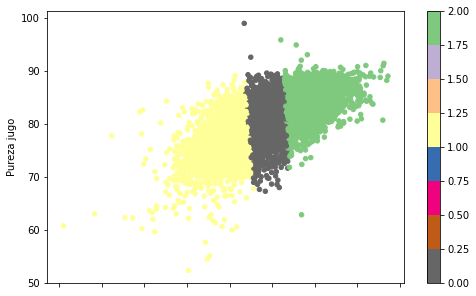

In [58]:
_ = df_cluster_1.plot(
    kind='scatter',
    y='Pureza jugo',
    x='Rdto. Pol Bascula',
    c=kmeans.predict(df_cluster_1),
    cmap='Accent_r',
    figsize=(8, 5)
)

<h2>Resultado de algoritmo de DBSCAN</h2>

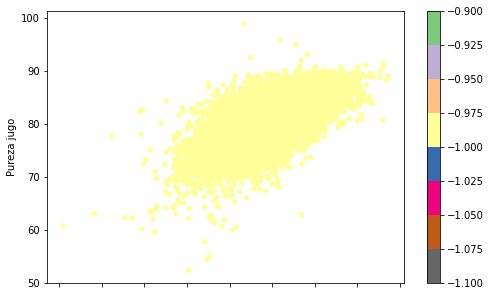

In [59]:
_ = df_cluster_1.plot(
    kind='scatter',
    y='Pureza jugo',
    x='Rdto. Pol Bascula',
    c=preds,
    cmap='Accent_r',
    figsize=(8, 5)
)

<h3>Complicaciones</h3>
<p>Como vemos, el algoritmo DBSCAN parece no ser efectivo en comparación a k-means. Veamos la data cruda</p>

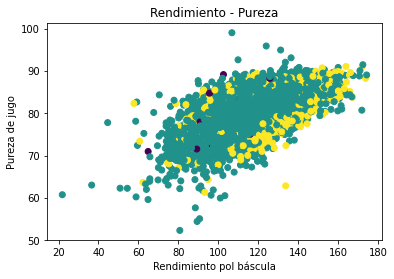

In [62]:
_ = plt.scatter( y=df_cluster_1['Pureza jugo'], x=df_cluster_1['Rdto. Pol Bascula'], c=df_cluster_1['Estrato'])
plt.figsize = (8,5)
plt.xlabel('Rendimiento pol báscula')
plt.ylabel('Pureza de jugo')
plt.title('Rendimiento - Pureza')
plt.show()

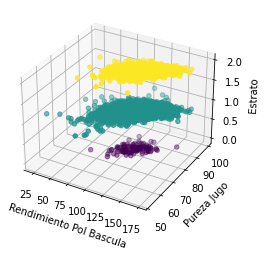

In [65]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
_ = ax.scatter(
    xs = df_cluster_1['Rdto. Pol Bascula'],
    ys= df_cluster_1['Pureza jugo'],
    zs= df_cluster_1['Estrato'],
    c=df_cluster_1['Estrato'])
ax.set_xlabel('Rendimiento Pol Bascula')
ax.set_ylabel('Pureza Jugo')
ax.set_zlabel('Estrato')
plt.figsize = (15,15)
plt.show()

<h3> Revisando histogramas </h3>

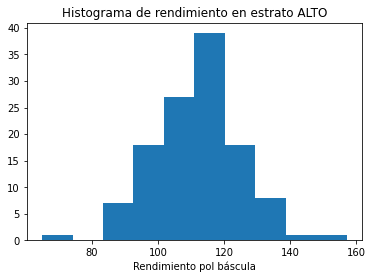

In [66]:
temp = df_cluster_1[df_cluster_1['Estrato']==0]
_ = plt.hist(temp['Rdto. Pol Bascula'])
plt.xlabel('Rendimiento pol báscula')
plt.title('Histograma de rendimiento en estrato ALTO')
plt.figsize = (8,5)
plt.show()

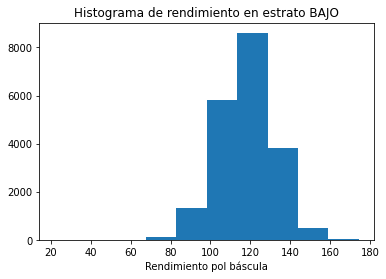

In [67]:
temp = df_cluster_1[df_cluster_1['Estrato']==1]
_ = plt.hist(temp['Rdto. Pol Bascula'])
plt.xlabel('Rendimiento pol báscula')
plt.title('Histograma de rendimiento en estrato BAJO')
plt.figsize = (8,5)
plt.show()

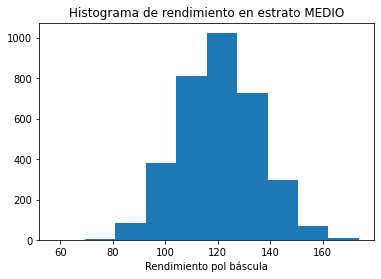

In [68]:
temp = df_cluster_1[df_cluster_1['Estrato']==2]
_ = plt.hist(temp['Rdto. Pol Bascula'])
plt.xlabel('Rendimiento pol báscula')
plt.title('Histograma de rendimiento en estrato MEDIO')
plt.figsize = (8,5)
plt.show()